In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

### Preparacao de dados

In [2]:
data = load_iris()


list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
sepal_length = 5.9
sepal_width = 9.0
petal_length = 5.1
petal_width = 1.8
x = np.array([sepal_length,	sepal_width, petal_length,petal_width	])
x = x.reshape((1,4))
x = pd.DataFrame(x, columns=['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)'])
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,9.0,5.1,1.8


In [6]:
df_target = pd.DataFrame(data.target, columns=['target'])
df_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [7]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=['target'])
df = pd.concat([df,df_target], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
treino = df.sample(int(len(df)*0.8))

X_treino = treino[list(data.feature_names)]
y_treino = treino[["target"]]

teste = df[~df.index.isin(treino.index)]

X_teste = teste[list(data.feature_names)]
y_teste = teste[["target"]]

### Modelos

Random Forest

In [9]:
clf1 = RandomForestClassifier(max_depth=2, random_state=0)

In [10]:
clf1.fit(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=2, random_state=0)

Logistic Regression

In [11]:
clf2 = LogisticRegression(random_state=0)

In [12]:
clf2.fit(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


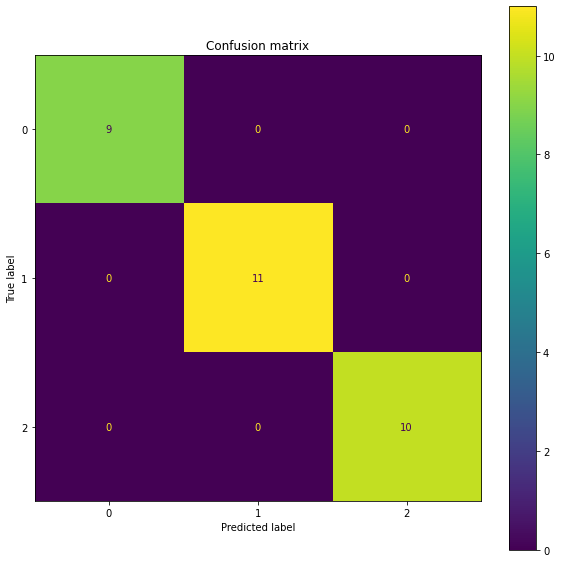

In [13]:
_ , ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf1, X_teste, y_teste, ax=ax)
plt.title('Confusion matrix')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


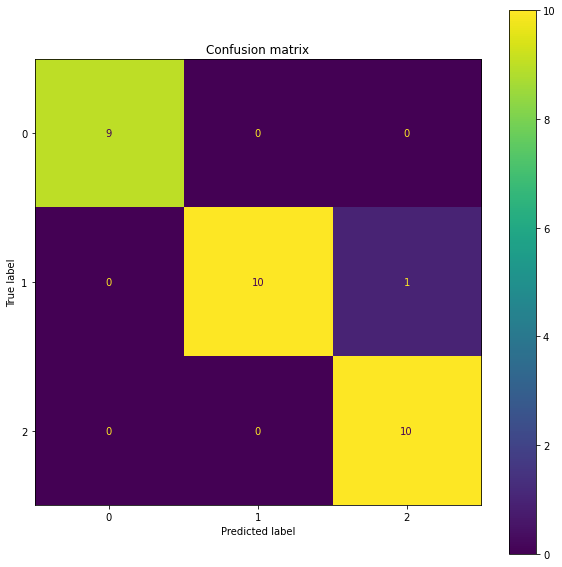

In [14]:
_ , ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf2, X_teste, y_teste, ax=ax)
plt.title('Confusion matrix')
plt.show()

###FUNCAO - COMO ENTRREGAR O PRODUTO!!!!

In [15]:
x = np.array([5.9,	3.0,	5.1,	1.8	])
x = x.reshape((1,4))
clf2.predict(x)[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


2

In [23]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
def iris(sepal_length,	sepal_width, petal_length,petal_width):
  x = np.array([sepal_length,	sepal_width, petal_length,petal_width	])
  x = x.reshape((1,4))
  flor =  clf2.predict(x)[0]
  return flor
  # return data.target_names[flor]


In [29]:
iris(5.9,	1.0,	0.1,	1.8)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

#Save model

In [21]:
import joblib

In [22]:
joblib.dump(clf2,'logistic_model')

['logistic_model']

In [22]:
iris(5.9,	9.0,	5.1,	1.8)

In [ ]:
data.feature_names

In [ ]:
x = pd.DataFrame(np.array([5.9,	9.0,	5.1,	1.8]).reshape(1,-1), columns=data.feature_names)
x

In [ ]:
curl -X POST -H "Content-Type: application/json" \
    -d '{"values": ["5.9",	"9.0",	"5.1",	"1.8"]}' \
    localhost:5000/predict